# Building a Neural Network in raw Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### python inherent way of visualizing neurons

- this is not to be used (it is so difficult :d); kept here mainly to archive the learning process

In [2]:
# made-up input (same as the output from previous neurons or directly from the sensors)
inputs = [1, 2, 3, 2.5]

# different neurons have different set of weights and bias
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]


layer_outputs = [] # output of this layer
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0;
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


### dot-product

- using numpy dot-product; this is what will be used

In [3]:
inputs = [1, 2, 3, 2.5]

weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

# the order in the dot-product is important
output = np.dot(weights, inputs) + bias 
print(output)

4.8


In [4]:
inputs = [1, 2, 3, 2.5]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

# the order in the dot-product is important
output = np.dot(weights, inputs) + biases
print(output)

[4.8   1.21  2.385]


## Batch, Layer

- batch: n-dimensional inputs
    - parallel processing
    - generalizations
    
common size: 32

In [5]:
inputs = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

output = np.dot(inputs, np.array(weights).T) + biases
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


- add another layer:

In [6]:
weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]
biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs, np.array(weights).T) + biases

layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2
print(layer2_output)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


### Object (OOP):

In [7]:
# input: conventionally denoted as X
X = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

np.random.seed(0) # to control the randomness

# to visualize what the __init__ is constructing: dimension of n_inputs by n_neurons 
#                                              --> this is to help not do the transpose in forward pass
# print(0.10 * np.random.randn(4, 3)) 

# layer object:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs must be consistent to the input size
        n_neurons is what you desire for this layer, any number (of neurons) that makes sense at this layer
        """
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

        
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2) # layer 2 is getting the output of layer 1 as its input

layer1.forward(X)
print("layer 1's output: \n {}".format(layer1.output))

layer2.forward(layer1.output)
print("layer 2's output: \n {}".format(layer2.output))    

layer 1's output: 
 [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
layer 2's output: 
 [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Hidden Layer Activation Function

### Rectifier (ReLU):
- need 2 layers (first control activation, second control deactivation)

In [8]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

# this is the ReLU function
for i in inputs:
    output.append(max(0, i))
        
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


### creating ReLU object:

In [9]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

#### generating a data set (spiral data function)
- [github](https://gist.github.com/Sentdex/454cb20ec5acf0e76ee8ab8448e6266c)
- this is from a Stanford [course](https://cs231n.github.io/neural-networks-case-study/)

In [10]:
#https://cs231n.github.io/neural-networks-case-study/
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

# to visualize:
# X, y = spiral_data(100, 3)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.show()

### ReLU Activation function application:

In [11]:
# layer object:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs must be consistent to the input size
        n_neurons is what you desire for this layer, any number (of neurons) that makes sense at this layer
        """
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
np.random.seed(0)
X, y = spiral_data(100, 3)

layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)
# print(layer1.output)

activation1.forward(layer1.output)
print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]
 [1.07817915e-01 0.00000000e+00 0.00000000e+00 8.72561871e-02
  0.00000000e+00]]


### Softmax Activation (for output layer)
- ReLU 'clips' every negative value to 0, which means it lost all its meaning
- we want the output be some sort of a probability distribution so that we can learn something
- exponential function $y = e^x$ helps to keep negative $x$'s implication in the output
- then, normalize the exponentiated values into probabilities

In [12]:
layer_outputs = [
    [4.8, 1.21, 2.385],
    [8.9, -1.81, 0.2],
    [1.41, 1.051, 0.026]
]

# exponentiate the values
exp_values = np.exp(layer_outputs)
print("exponentiated values: \n {}".format(exp_values))

# normalizethe values
# we want the following to apply to each row of data
# norm_values = exp_values / np.sum(exp_values); achieved by the following code
# axis = 1 helps to sum each row, keepdims helps to give the output of correct shape
norm_values = exp_values / np.sum(layer_outputs, axis = 1, keepdims = True)

print(f"normalized values: \n {norm_values}")

exponentiated values: 
 [[1.21510418e+02 3.35348465e+00 1.08590627e+01]
 [7.33197354e+03 1.63654137e-01 1.22140276e+00]
 [4.09595540e+00 2.86051020e+00 1.02634095e+00]]
normalized values: 
 [[1.44741415e+01 3.99462138e-01 1.29351551e+00]
 [1.00575769e+03 2.24491271e-02 1.67544960e-01]
 [1.64694628e+00 1.15018504e+00 4.12682327e-01]]


- exponentiation function grows rapidly, very easy to encounter overflow error
- we subtract the input values by the maximum values of those inputs then do the exponentiation
- this way the range of exponentiation can only goes to 1, all the other input values would be negative and thus exponentiation of them goes to some value between 0 and 1:
    - for all $v \in \vec{V}$: $v - \max{v_i}$; then take $y = e^{v_i}$; now it must be that $y \in \{0, 1\}$ because all $v_i \in \{-\infty, 0\}$

### Softmax object class:

In [13]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        # this is what is discussed above, preventing the overflow error
        
        probs = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probs

In [14]:
# overall example so far:

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs must be consistent to the input size
        n_neurons is what you desire for this layer, any number (of neurons) that makes sense at this layer
        """
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        # this is what is discussed above, preventing the overflow error
        
        probs = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probs

        
np.random.seed(0)
X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341967]
 [0.33325941 0.33326395 0.33347665]
 [0.33323311 0.33323926 0.33352763]]


## Calculating Loss

- with Softmax, output is a probability distribution, therefore categorical, this leads to:

### Categorical Cross-Entropy

$$L_i = -\log(\hat{y}_{i,k})$$

- $L_i$: sample loss value
- $\hat{y}$: predicted value
- $i$: i-th sample in a set
- $k$: target label index, index of correct class probability

### One-hot encoding

- One-hot vector: size is of 'classes', and all $0$ except at the index of 'Label' (where the value is $1$)

In [15]:
# example:
"""
Classes: 3
Labels: 0
One-hot vector: [1, 0, 0]
Prediction: [0.7, 0.1, 0.2]
"""

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

loss = -(np.log(softmax_output) * target_output)
print(loss)

# observe the two vectors, note the above is the same as:
loss2 = -(np.log(softmax_output[0]))
print(loss2)

[0.35667494 0.         0.        ]
0.35667494393873245


## Implement Loss

- since we will be working with batches: we have the following:

In [16]:
softmax_outputs = np.array(
    [[0.7, 0.1, 0.2],
     [0.1, 0.5, 0.4],
     [0.02, 0.9, 0.08]]
)
class_targets = [0, 1, 1]

print(softmax_outputs[[0,1,2], class_targets]) # the [0,1,2] are the index in the np.array; 
# then the class_targets refer to which element in that vector

neg_log = -np.log(softmax_outputs[[0,1,2], class_targets])
print(neg_log)

[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]


-  one subtlety: $-\log(0) = \infty$, this mess up when we want to take the mean
- therefore we 'clip' the softmax_outputs by setting the range from (1e-7) to (1 - 1e-7)

### Loss Object:

In [17]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CatCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        # clip the values:
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1: # this means y_true is a simple vector
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2: # this means the y_true is in array of one-hot vectors
            correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)
            
        neg_log_likelihoods = -np.log(correct_confidences)
        return neg_log_likelihoods

In [18]:
# continue from above overall example:

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

# to visualize:
# X, y = spiral_data(100, 3)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.show()


class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs must be consistent to the input size
        n_neurons is what you desire for this layer, any number (of neurons) that makes sense at this layer
        """
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        # this is what is discussed above, preventing the overflow error
        
        probs = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probs
        

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CatCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        # clip the values:
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1: # this means y_true is a simple vector
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2: # this means the y_true is in array of one-hot vectors
            correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)
            
        neg_log_likelihoods = -np.log(correct_confidences)
        return neg_log_likelihoods

        
np.random.seed(0)
X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

# print(activation2.output[:5])

loss_function = Loss_CatCrossEntropy()
loss = loss_function.calculate(activation2.output, y)

print(f"Loss: {loss}")

Loss: 1.0984449588022467


## Optimization

- randomly assign weights and biases is not good
- we want to make changes to the last best known weights and biases

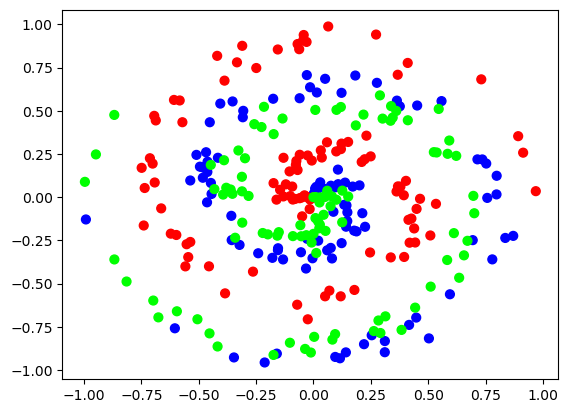

In [19]:
# generate a spiral data set:

X, y = spiral_data(100, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

- this is obvious that it requires non-linear optimization
- therefore a random searching is not ideal as it is easy to reach a local minimum and never gets out

### impact to a function

- some weights and biases might be more influential than the others
- Ex. linear function: the slope indicates how much $y$ changes as $x$ changes by $1$ unit

- a non-linear function, however, at different $x$, the impact is different
- A: tangent line slope (numerical differentiation)

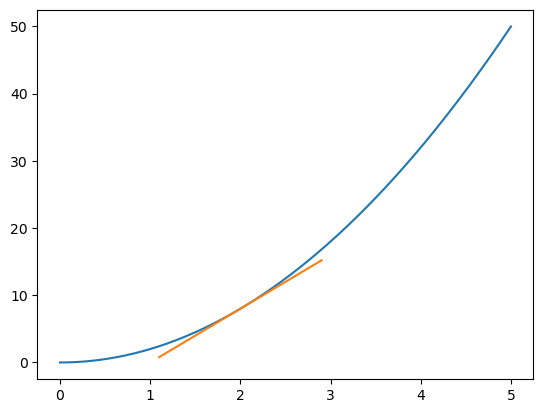

In [24]:
# example code to show the above idea:

def f(x):
    return 2*x**2 #y = 2x^2

x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)

p2_delta = 0.0001 # to get a point that is very very close to the point we are interested in
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approx_deri = (y2-y1) / (x2-x1)

b = y2 - approx_deri * x2 # to find the intercept of the slope line

def approx_tan_line(x):
    return approx_deri * x + b

to_plot = [x1-0.9, x1, x1+0.9]
plt.plot(to_plot, [approx_tan_line(point) for point in to_plot])

plt.show()

- in neural network, however, we do not have single variable
- this method (numerical derivative) will not be efficient (as it requires multiple forward passes), but the idea is important

### partial derivative